In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



In [117]:
mouse_metadata_path = "Matplotlib/Mouse_metadata.csv.csv"
study_results_path = "Matplotlib/Study_results.csv.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [118]:
single_dataset = pd.merge(mouse_metadata,study_results,how="left", on=["Mouse ID", "Mouse ID"])


In [110]:
single_dataset.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [119]:
single_dataset['Mouse ID'].value_counts()

g989    13
t724    10
s185    10
c559    10
y478    10
        ..
u153     1
f932     1
d133     1
v199     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [112]:
single_dataset['Mouse ID'].value_counts().head()
 

g989    13
t724    10
s185    10
c559    10
y478    10
Name: Mouse ID, dtype: int64

In [120]:
Numberofmice = single_dataset.set_index('Mouse ID')

Numberofmice

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [126]:
Numberofmice.count()

Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [127]:
clean_Numberofmice = Numberofmice.drop(index = 'g989')

clean_Numberofmice
clean_Numberofmice.count()

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [128]:
cleanindex_Numberofmice = clean_Numberofmice.reset_index()

cleanindex_Numberofmice
cleanindex_Numberofmice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


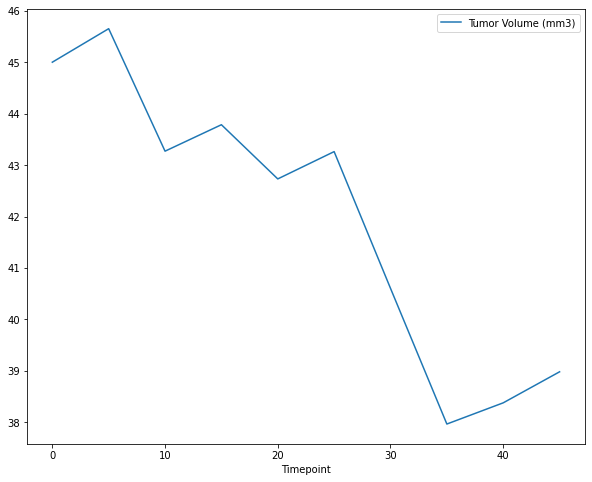

In [129]:
capomulin2 = cleanindex_Numberofmice.loc[cleanindex_Numberofmice["Drug Regimen"] == "Capomulin"]
capomulin2 = capomulin2.reset_index()
singlecapomulin = capomulin2.loc[capomulin2["Mouse ID"] == "b128"]
singlecapomulin = singlecapomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
singlecapomulin = singlecapomulin.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
singlecapomulin.set_index('Timepoint').plot(figsize=(10, 8))

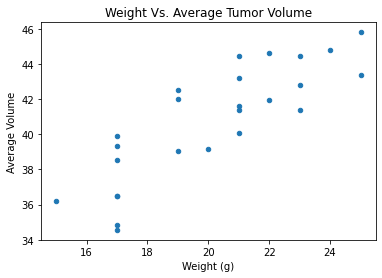

In [131]:
redcapomulin = capomulin2.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avecap = pd.DataFrame(redcapomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avecap = avecap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avecap = avecap.set_index('Mouse ID')
avecap.plot(kind="scatter", x="Weight (g)", y="Average Volume",
              title="Weight Vs. Average Tumor Volume")